# Sentiment Classification using LSTM

In [1]:
import tensorflow as tf
import numpy as np

In [2]:
max_features = 20_000
max_len = 200

In [3]:
(X_train, y_train ), (X_test, y_test )= tf.keras.datasets.imdb.load_data(num_words=max_features)

In [4]:
X_train.shape, y_train.shape

((25000,), (25000,))

In [5]:
X_train_padded_seq = tf.keras.preprocessing.sequence.pad_sequences(X_train, maxlen=max_len, truncating='post',padding='post')

In [6]:
X_test_padded_seq = tf.keras.preprocessing.sequence.pad_sequences(X_test, maxlen=max_len, truncating='post',padding='post')

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(max_features, 128, input_length=max_len),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(units=64, return_sequences=True, activation='tanh')),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(units=64, return_sequences=True, activation='tanh')),
    tf.keras.layers.TimeDistributed( tf.keras.layers.Dense(1, activation='sigmoid'))
])

Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2022-04-02 15:19:19.610224: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-04-02 15:19:19.610318: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 128)          2560000   
                                                                 
 bidirectional (Bidirectiona  (None, 200, 128)         98816     
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 200, 128)         98816     
 nal)                                                            
                                                                 
 time_distributed (TimeDistr  (None, 200, 1)           129       
 ibuted)                                                         
                                                                 
Total params: 2,757,761
Trainable params: 2,757,761
Non-trainable params: 0
______________________________________________

In [9]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [10]:
EPOCHS = 5
BATCH_SIZE = 32

history = model.fit(X_train_padded_seq, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, validation_data=(X_test_padded_seq, y_test), verbose=2)

Epoch 1/5


2022-04-02 15:19:23.099923: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-04-02 15:19:25.507274: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-04-02 15:19:25.928679: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-04-02 15:19:25.939618: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-04-02 15:19:26.400958: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-04-02 15:19:26.411447: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-04-02 15:19:26.907676: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113

782/782 - 238s - loss: 0.6934 - accuracy: 0.5020 - val_loss: 0.6932 - val_accuracy: 0.5000 - 238s/epoch - 304ms/step
Epoch 2/5
782/782 - 227s - loss: 0.6932 - accuracy: 0.4931 - val_loss: 0.6932 - val_accuracy: 0.5000 - 227s/epoch - 291ms/step
Epoch 3/5
782/782 - 224s - loss: 0.6932 - accuracy: 0.4973 - val_loss: 0.6931 - val_accuracy: 0.5032 - 224s/epoch - 286ms/step
Epoch 4/5
782/782 - 226s - loss: 0.6932 - accuracy: 0.5019 - val_loss: 0.6933 - val_accuracy: 0.5000 - 226s/epoch - 289ms/step
Epoch 5/5
782/782 - 230s - loss: 0.6932 - accuracy: 0.5045 - val_loss: 0.6932 - val_accuracy: 0.5003 - 230s/epoch - 293ms/step


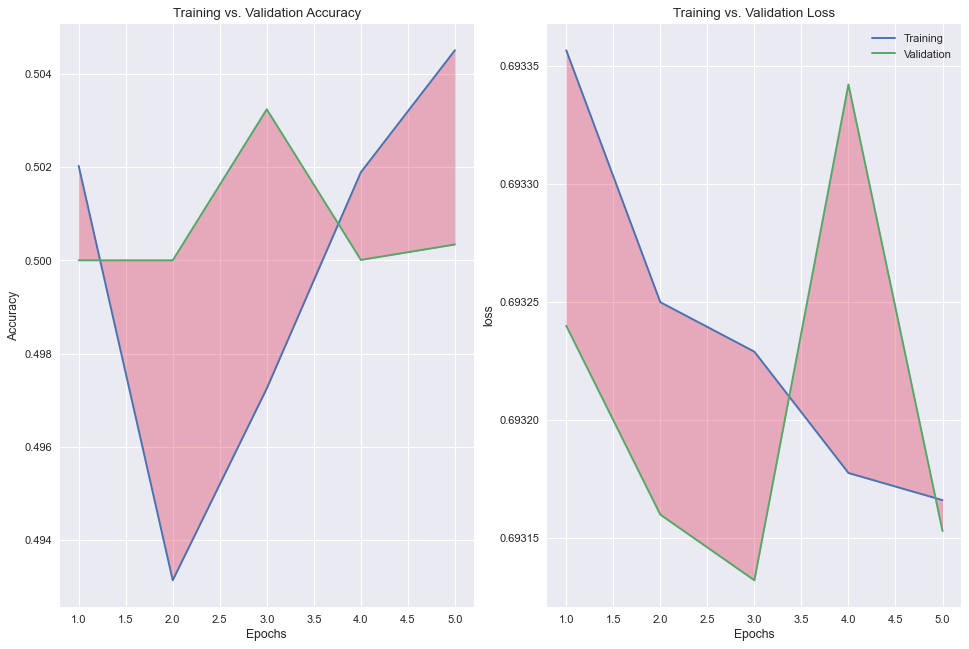

In [12]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epo = range(1, len(acc)+1)

fig, ax = plt.subplots(1, 2, constrained_layout=True, figsize=(12,8), dpi=80)
plt.style.use('seaborn')

ax[0].plot(epo, acc, label='Training')
ax[0].plot(epo, val_acc, label='Validation')
ax[0].plot(alpha=0.3)
ax[0].title.set_text('Training vs. Validation Accuracy')
ax[0].fill_between(epo, acc, val_acc, color='crimson', alpha=0.3)
plt.setp(ax[0], xlabel='Epochs', ylabel='Accuracy')

ax[1].plot(epo, loss, label='Training')
ax[1].plot(epo, val_loss, label='Validation')
ax[1].plot(alpha=0.3)
ax[1].title.set_text('Training vs. Validation Loss')
ax[1].fill_between(epo, loss, val_loss, color='crimson', alpha=0.3)
plt.setp(ax[1], xlabel='Epochs', ylabel='loss')
plt.legend()